# Анализ решений по апелляциям на постановления ГИБДД
## п.3 Exploratory Data Analysis

Цель данного этапа:
EDA решений по обжалованиям:  
1) Построение распредений в абсолютном и процентном соотношении удовлетворений/отказов по жалобам по разным статьям КоАП, судам, судьями другим факторам.  
2) Построение динамики процента удовлетворений во времени с учётом различных факторов (статьи, суды).  
3) Поиск факторов, влияющих на удовлетворение жалоб по каждой статье (или кластеру статей).  
4) Выявление закономерностей между результатом решения и призаками решения.  

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load from csv back
df_gibdd = pd.read_csv('df_gibdd.csv')
df_gibdd

,region,court,judge,vidpr,etapd,category,result,date,vid_dokumenta,file,...,video,DTP,registrator,svidetel,ponyatoy,passazhir,peshekhod,poterpevshiy,judgments_type,judgment_termination
0,Москва,Басманный районный суд (Город Москва),Карпов Артур Геннадьевич,Административное,Апелляция,12.16 ч.1,Оставлено без изменения,06.11.2012,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,видео,True,False,True,False,False,False,False,Постановление по делу об АП,False
1,Москва,Басманный районный суд (Город Москва),Дударь Н. Н.,Административное,Апелляция,12.14 ч.3,Оставлено без изменения,05.07.2012,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,True,False,False,False,False,False,False,Постановление по делу об АП,False
2,Москва,Басманный районный суд (Город Москва),Дударь Н. Н.,Административное,Апелляция,12.14 ч.3,Оставлено без изменения,05.07.2012,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,True,False,True,False,True,False,False,Постановление по делу об АП,False
3,Москва,Басманный районный суд (Город Москва),Дударь Наталия Николаевна,Административное,Апелляция,12.14 ч.3,Оставлено без изменения,13.09.2012,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,True,False,False,False,False,False,False,Постановление по делу об АП,False
4,Москва,Басманный районный суд (Город Москва),Скуридина Ирина Анатольевна,Административное,Апелляция,12.16 ч.5,Оставлено без изменения,07.03.2013,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,False,False,False,False,False,False,False,Постановление по делу об АП,False
5,Москва,Басманный районный суд (Город Москва),Скуридина Ирина Анатольевна,Административное,Апелляция,12.16 ч.5,Оставлено без изменения,07.03.2013,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,False,False,False,False,False,True,False,Постановление по делу об АП,False
6,Москва,Басманный районный суд (Город Москва),Скуридина Ирина Анатольевна,Административное,Апелляция,12.16 ч.1,Оставлено без изменения,06.03.2013,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,ЦОДД,False,False,NaN,False,False,True,False,Постановление по делу об АП,False
7,Москва,Басманный районный суд (Город Москва),Карпов А. Г.,Административное,Апелляция,12.13 ч.2,Оставлено без изменения,03.11.2010,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,True,False,False,False,False,False,False,Постановление по делу об АП,False
8,Москва,Басманный районный суд (Город Москва),Скуридина И. А.,Административное,Апелляция,12.19 ч.4,Оставлено без изменения,25.05.2011,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,False,False,False,False,False,False,False,Постановление по делу об АП,False
9,Москва,Басманный районный суд (Город Москва),Мушникова Н. Е.,Административное,Апелляция,12.15 ч.4,Оставлено без изменения,02.06.2011,решение,../../data/sou/basmannyj-rajonnyj-sud-gorod-mo...,...,NaN,False,False,False,False,False,False,False,Постановление о прекращении дела об АП,True


## 1. Построение распределений решений по различным признакам

In [108]:
column = 'result'
len(df_gibdd[column].unique())

5

In [113]:
features_to_plot = []
for column in df_gibdd.columns:
    if (len(df_gibdd[column].unique()) > 1)&(len(df_gibdd[column].unique()) < 50):
        features_to_plot.append(column)
features_to_plot

['court',
 'category',
 'result',
 'representative',
 'photo',
 'video',
 'DTP',
 'registrator',
 'svidetel',
 'ponyatoy',
 'passazhir',
 'peshekhod',
 'poterpevshiy',
 'judgments_type',
 'judgment_termination']

In [257]:
data_sum_courts = df_gibdd.groupby(['court']).count().reset_index()
data_sum_courts['sum_court'] = data_sum_courts['result']
data_sum_courts = data_sum_courts[['court', 'sum_court']]
data_sum_courts

,court,sum_court
0,Басманный районный суд (Город Москва),12
1,Гагаринский районный суд (Город Москва),4
2,Зеленоградский районный суд (Город Москва),109
3,Зюзинский районный суд (Город Москва),2
4,Измайловский районный суд (Город Москва),12
5,Коптевский районный суд (Город Москва),1
6,Кузьминский районный суд (Город Москва),24
7,Кунцевский районный суд (Город Москва),2
8,Мещанский районный суд (Город Москва),10
9,Никулинский районный суд (Город Москва),8


In [260]:
data = df_gibdd.groupby(['court', 'result']).count()
data.reset_index(inplace=True)
data['sum']=data['region']
data=data[['court', 'result', 'sum']]
data_full = pd.merge(data, data_sum_courts, how='inner', on='court')
data_full['percent_by_court'] = data_full['sum']/data_full['sum_court']*100
data_full

,court,result,sum,sum_court,percent_by_court
0,Басманный районный суд (Город Москва),Оставлено без изменения,11,12,91.666667
1,Басманный районный суд (Город Москва),Отменено возвращением на новое рассмотрение,1,12,8.333333
2,Гагаринский районный суд (Город Москва),Оставлено без изменения,3,4,75.000000
3,Гагаринский районный суд (Город Москва),Отменено возвращением на новое рассмотрение,1,4,25.000000
4,Зеленоградский районный суд (Город Москва),Изменено,4,109,3.669725
5,Зеленоградский районный суд (Город Москва),Не определено,2,109,1.834862
6,Зеленоградский районный суд (Город Москва),Оставлено без изменения,46,109,42.201835
7,Зеленоградский районный суд (Город Москва),Отменено возвращением на новое рассмотрение,38,109,34.862385
8,Зеленоградский районный суд (Город Москва),Отменено с прекращением производства,19,109,17.431193
9,Зюзинский районный суд (Город Москва),Оставлено без изменения,1,2,50.000000


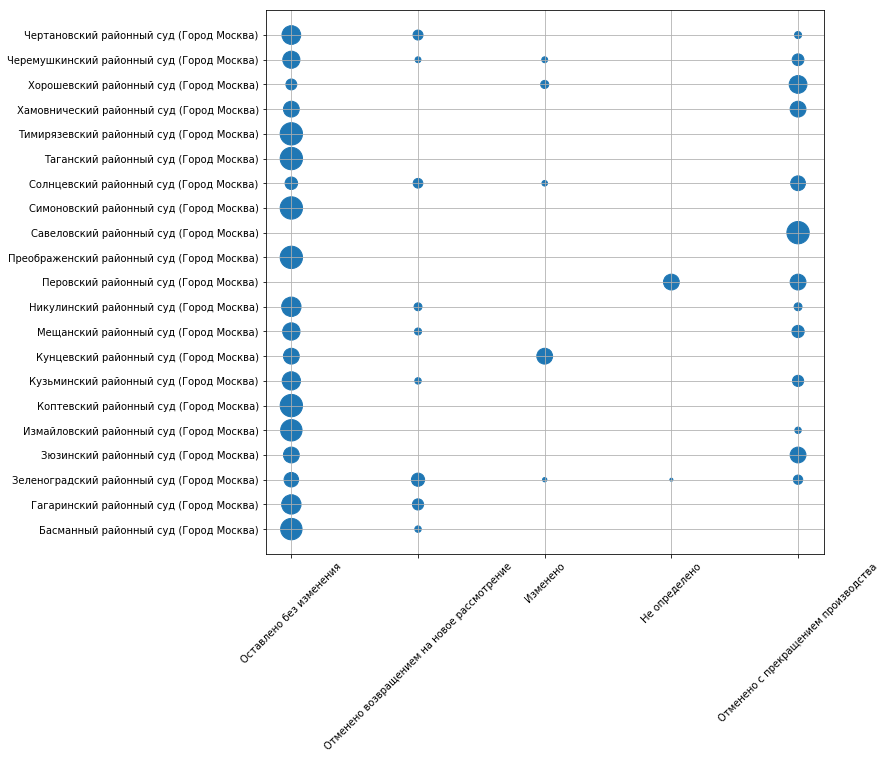

In [302]:
data = data_full

f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation=45)
plt.grid(True)
plt.scatter(y=data.court, 
            x=data.result, 
            s=data.percent_by_court*5,
            marker='o')

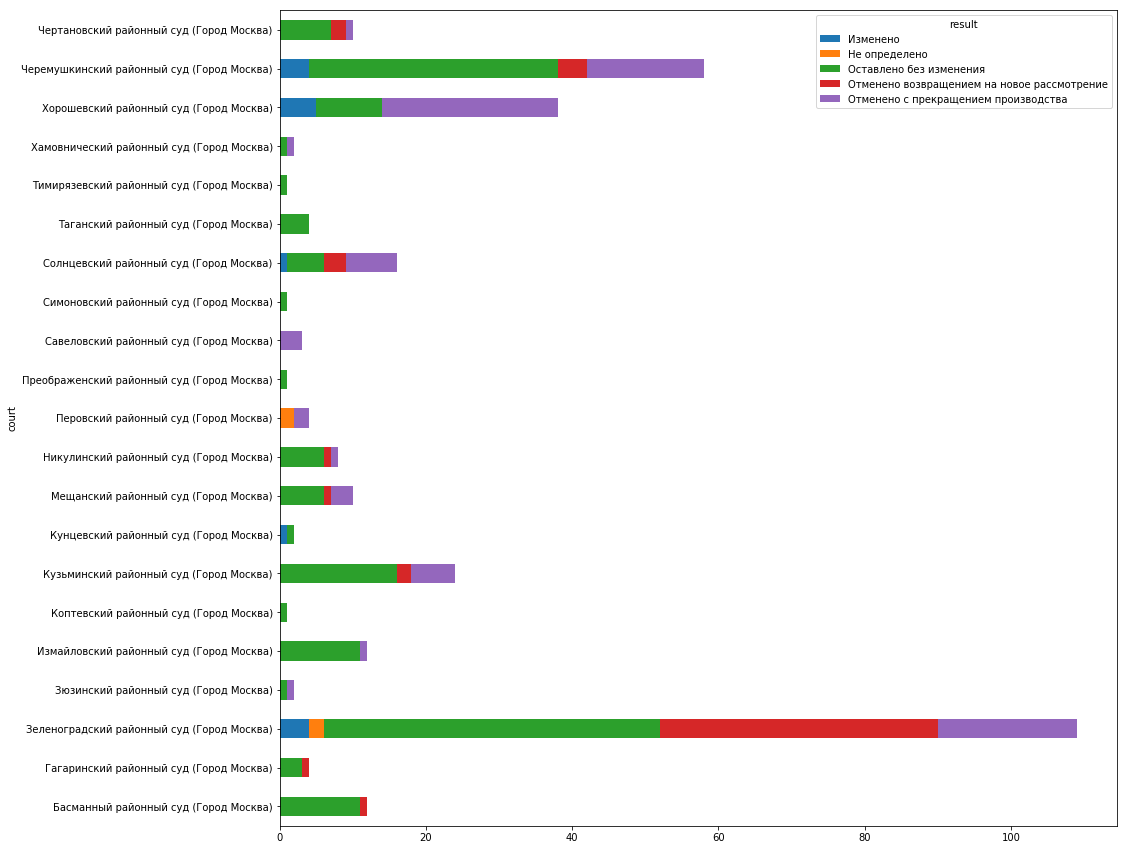

In [236]:
data = df_gibdd.pivot_table(columns='result', index = 'court', values = 'region', fill_value=0, aggfunc=func='count')
data.plot.barh(stacked=True, figsize=(15,15))

In [228]:
data = df_gibdd.pivot_table(columns='result', index = 'court', values = 'region', fill_value=0, aggfunc='count')
#data.sum(axis=1)
#for column in data.columns:
#    data[column]=data[column]/data.sum(axis=1)
data.index

Index(['Басманный районный суд (Город Москва)',
       'Гагаринский районный суд (Город Москва)',
       'Зеленоградский районный суд (Город Москва)',
       'Зюзинский районный суд (Город Москва)',
       'Измайловский районный суд (Город Москва)',
       'Коптевский районный суд (Город Москва)',
       'Кузьминский районный суд (Город Москва)',
       'Кунцевский районный суд (Город Москва)',
       'Мещанский районный суд (Город Москва)',
       'Никулинский районный суд (Город Москва)',
       'Перовский районный суд (Город Москва)',
       'Преображенский районный суд (Город Москва)',
       'Савеловский районный суд (Город Москва)',
       'Симоновский районный суд (Город Москва)',
       'Солнцевский районный суд (Город Москва)',
       'Таганский районный суд (Город Москва)',
       'Тимирязевский районный суд (Город Москва)',
       'Хамовнический районный суд (Город Москва)',
       'Хорошевский районный суд (Город Москва)',
       'Черемушкинский районный суд (Город Москва)'

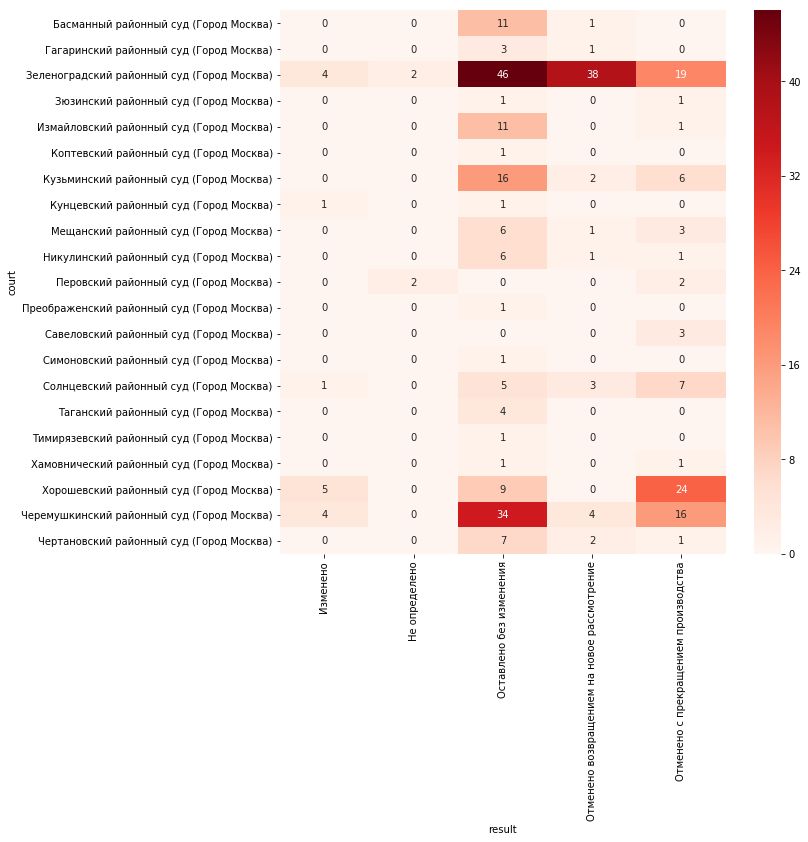

In [223]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, cmap='Reds', annot=True)

In [147]:
feature = features_to_plot[0]
data = df_gibdd[feature].value_counts()

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

Зеленоградский районный суд (Город Москва)    109
Черемушкинский районный суд (Город Москва)     58
Хорошевский районный суд (Город Москва)        38
Кузьминский районный суд (Город Москва)        24
Солнцевский районный суд (Город Москва)        16
Измайловский районный суд (Город Москва)       12
Басманный районный суд (Город Москва)          12
Чертановский районный суд (Город Москва)       10
Мещанский районный суд (Город Москва)          10
Никулинский районный суд (Город Москва)         8
Перовский районный суд (Город Москва)           4
Гагаринский районный суд (Город Москва)         4
Таганский районный суд (Город Москва)           4
Савеловский районный суд (Город Москва)         3
Хамовнический районный суд (Город Москва)       2
Кунцевский районный суд (Город Москва)          2
Зюзинский районный суд (Город Москва)           2
Коптевский районный суд (Город Москва)          1
Тимирязевский районный суд (Город Москва)       1
Преображенский районный суд (Город Москва)      1


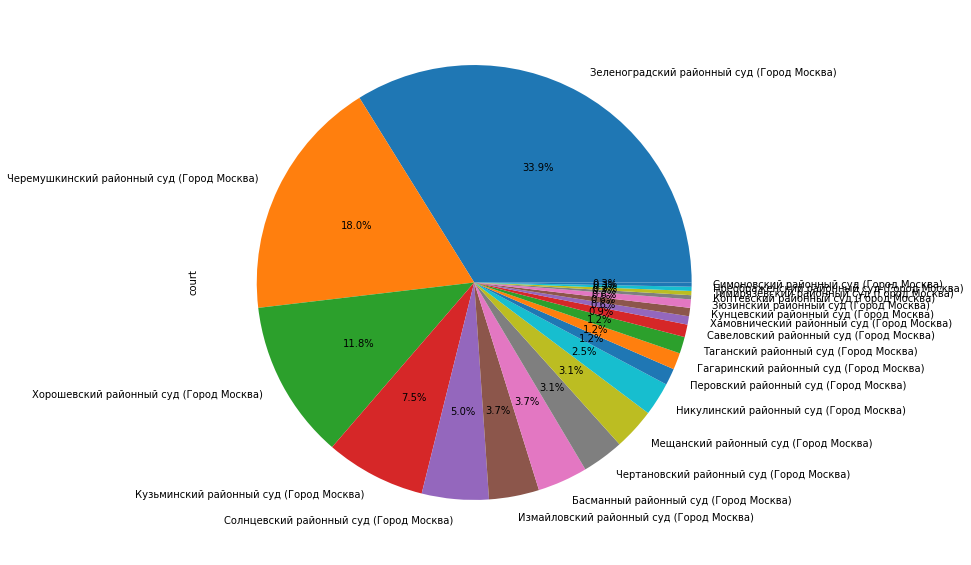

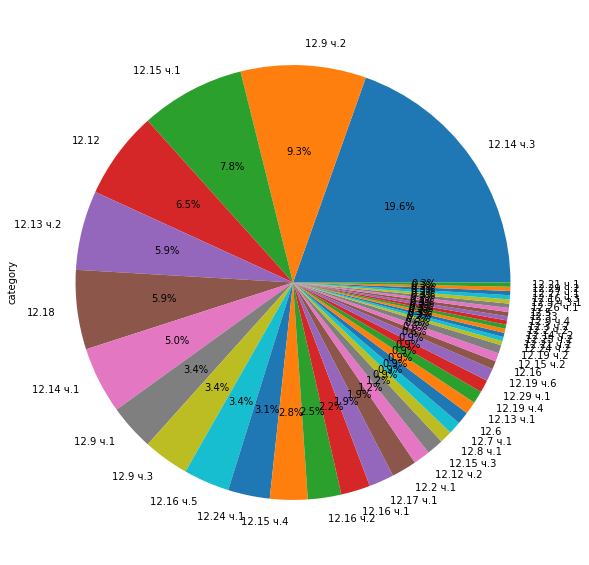

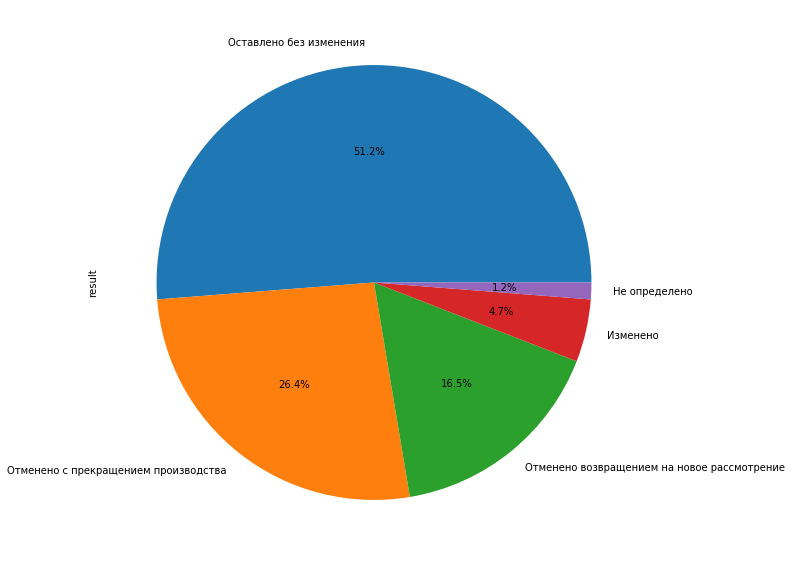

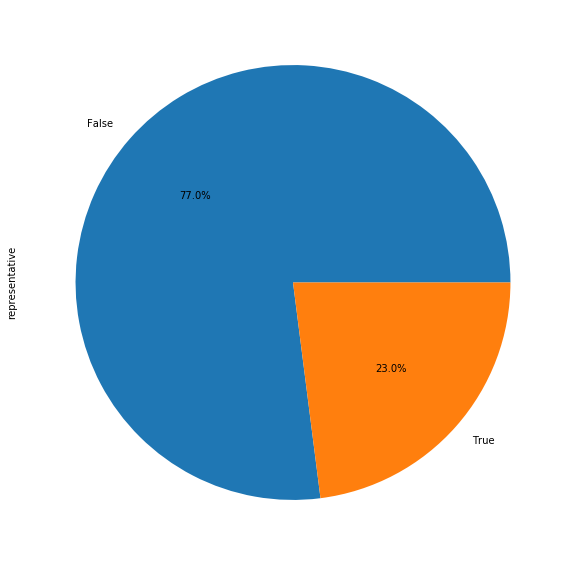

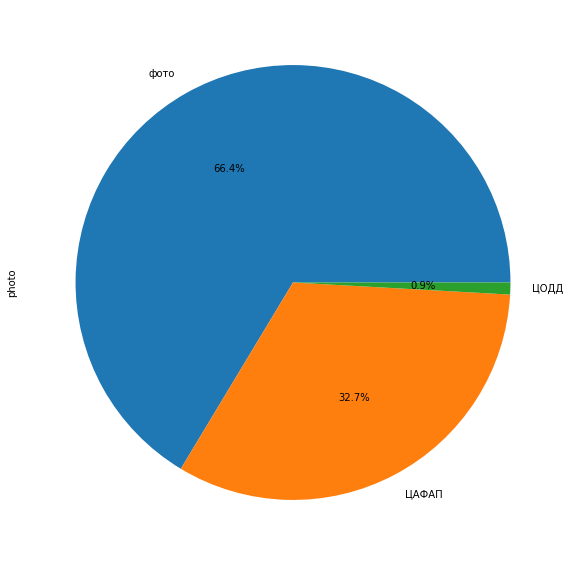

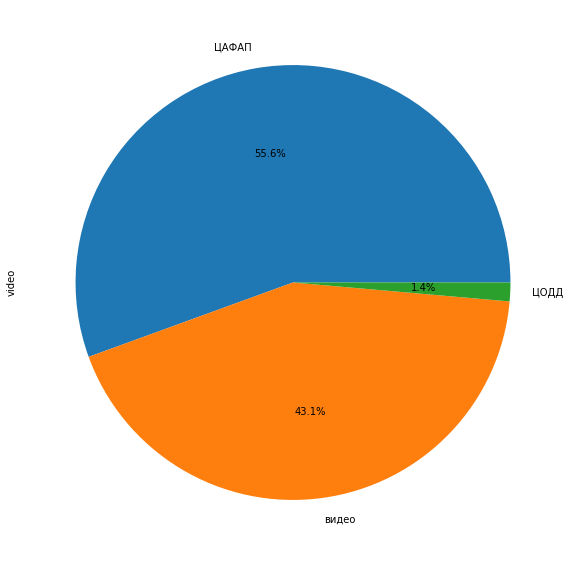

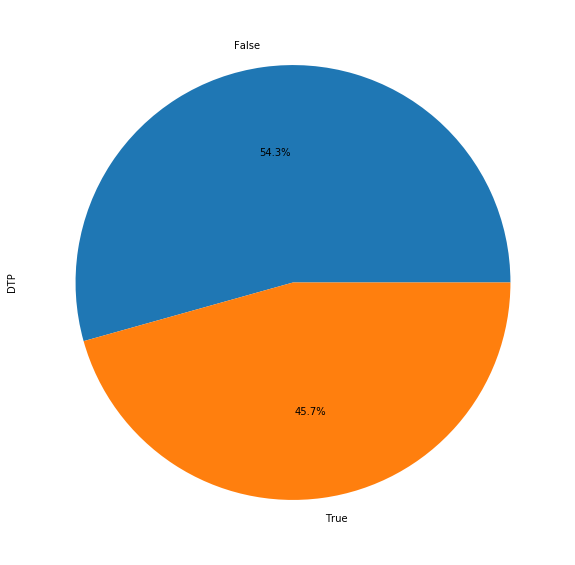

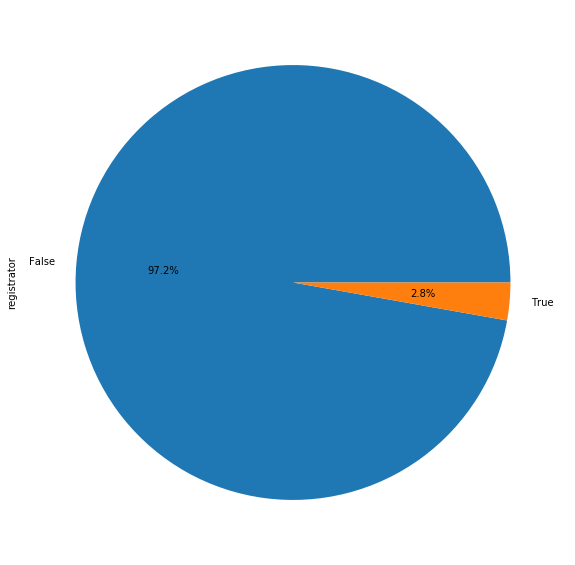

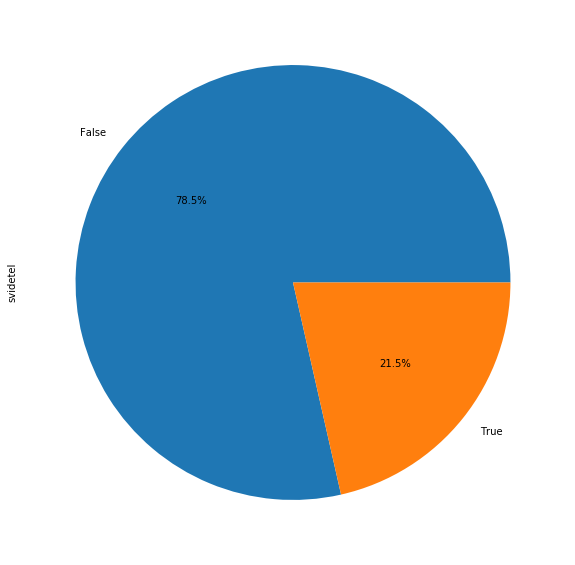

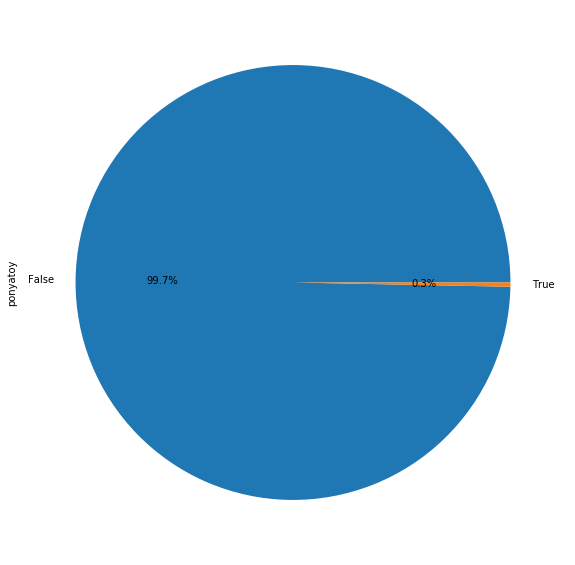

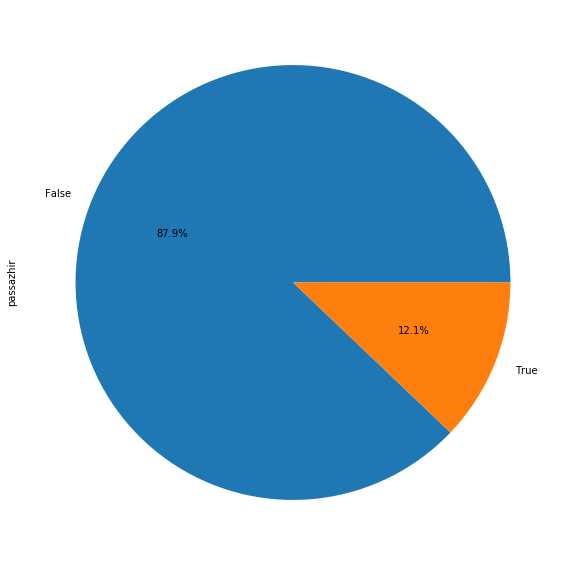

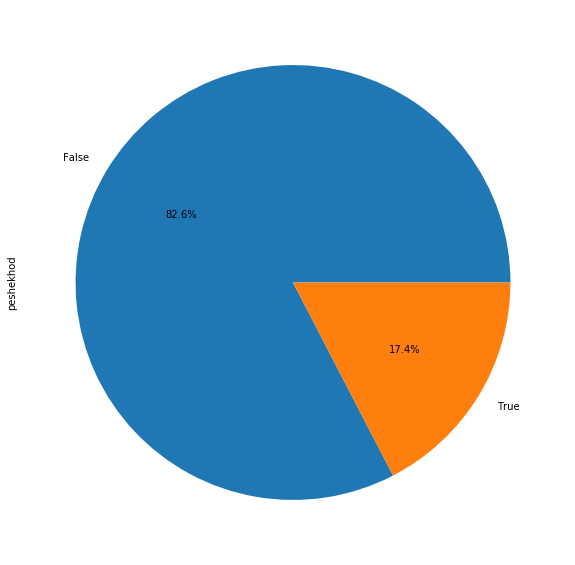

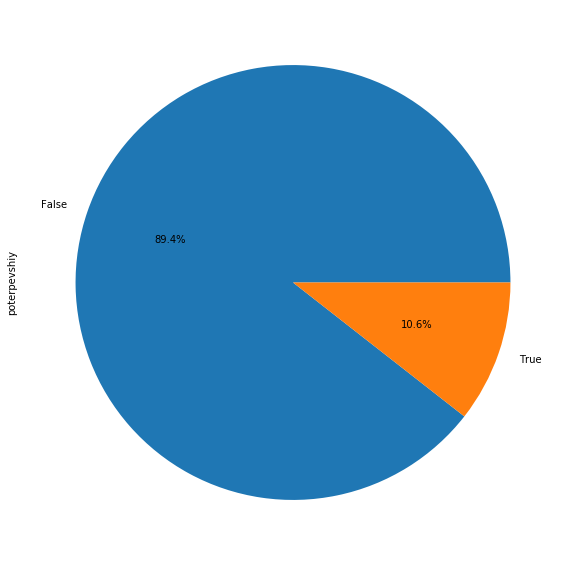

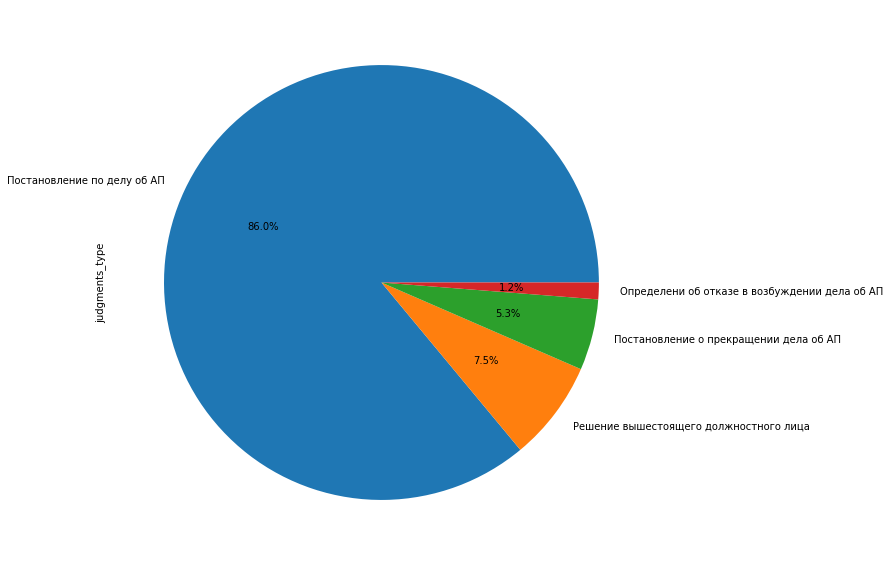

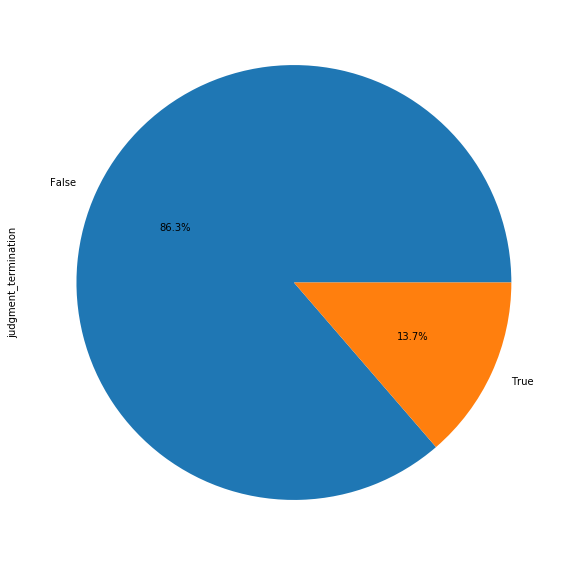

In [119]:
for feature in features_to_plot:
    pd.DataFrame(df_gibdd[feature].value_counts()).plot.pie(y = feature, figsize = (10,10), legend=False, autopct='%1.1f%%')